## Sentiment Analysis using Python and NLP

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
reviews = pd.read_csv('Reviews.csv')

In [3]:
reviews

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
reviews.shape

(568454, 10)

#### Dataset is too huge and robertA models are trained to run on a GPU rather than a CPU so that is why i am reducing the dataset and is selecting first 1000 data points for analysis

In [7]:
reviews = reviews.head(1000)

In [9]:
reviews.shape

(1000, 10)

In [10]:
reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

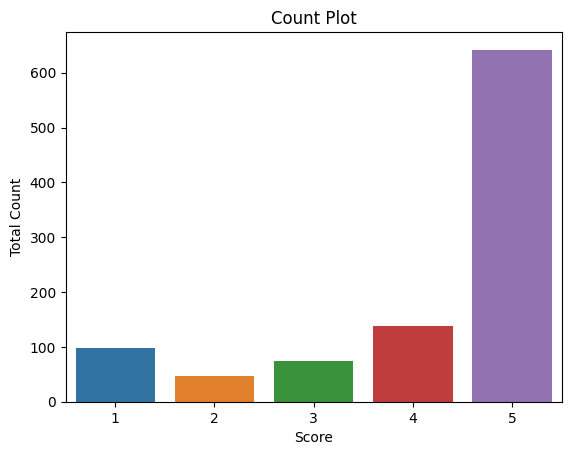

In [11]:
ax = sns.countplot(data = reviews, x = 'Score')
plt.title('Count Plot')
ax.set_ylabel('Total Count')
plt.show()

#### It is clear that out data is skewd towards 5 star reviews.

### VADER Approach to conduct sentiment analysis

In [12]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
obj = SentimentIntensityAnalyzer()

In [39]:
vader_res = {}
for i, row in reviews.iterrows():
    text = row['Text']
    myid = row['Id']
    vader_res[myid] = obj.polarity_scores(text)

In [40]:
vader_res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [41]:
vader_res = pd.DataFrame(vader_res)

In [42]:
vader_res

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.032,0.0000,0.0000,0.0000,0.0000,0.0260,0.0000,0.0000,0.0630,0.0270
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.667,0.6330,0.6620,0.8860,0.8280,0.7210,0.7860,0.6730,0.8740,0.9390
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.301,0.3670,0.3380,0.1140,0.1720,0.2530,0.2140,0.3270,0.0620,0.0340
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,0.973,0.9749,0.9636,0.8858,0.7552,0.9788,0.9309,0.9634,-0.0129,-0.1027


In [43]:
vader_res = vader_res.T

In [44]:
vader_res

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
996,0.026,0.721,0.253,0.9788
997,0.000,0.786,0.214,0.9309
998,0.000,0.673,0.327,0.9634
999,0.063,0.874,0.062,-0.0129


In [45]:
vader_res = vader_res.reset_index().rename(columns = {'index' : 'ID'})

In [46]:
vader_res

,ID,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
995,996,0.026,0.721,0.253,0.9788
996,997,0.000,0.786,0.214,0.9309
997,998,0.000,0.673,0.327,0.9634
998,999,0.063,0.874,0.062,-0.0129


In [50]:
reviews = reviews.rename(columns = {'Id' : 'ID'})

In [51]:
reviews

,ID,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
995,996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


In [52]:
score = vader_res.merge(reviews, how = 'left')

In [53]:
score

,ID,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.026,0.721,0.253,0.9788,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,0.000,0.786,0.214,0.9309,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,0.000,0.673,0.327,0.9634,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,0.063,0.874,0.062,-0.0129,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


### Let's test the results given by VADER Approach

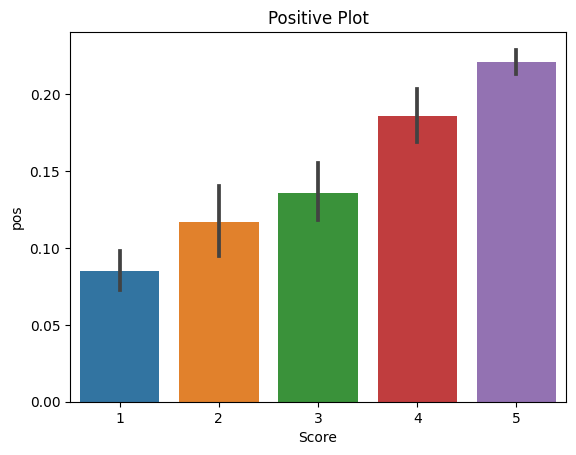

In [54]:
sns.barplot(x = 'Score', y = 'pos', data = score)
plt.title('Positive Plot')
plt.show()

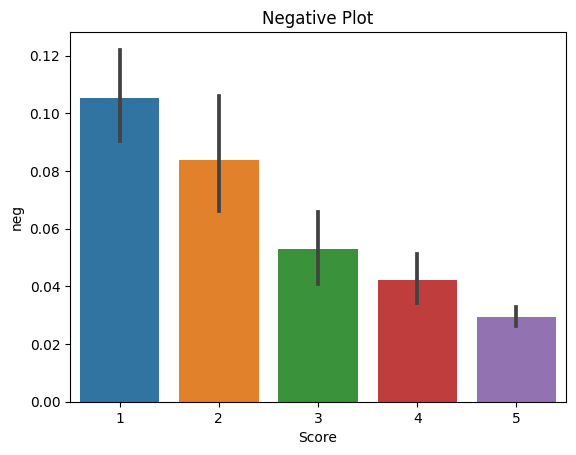

In [55]:
sns.barplot(x = 'Score', y = 'neg', data = score)
plt.title('Negative Plot')
plt.show()

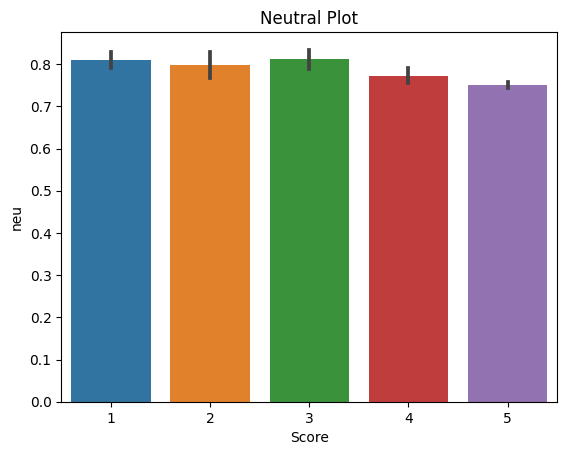

In [56]:
sns.barplot(x = 'Score', y = 'neu', data = score)
plt.title('Neutral Plot')
plt.show()

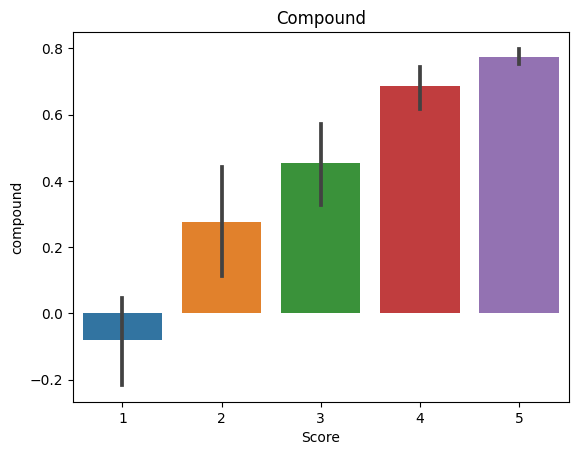

In [57]:
sns.barplot(x = 'Score', y = 'compound', data = score)
plt.title('Compound')
plt.show()

#### So here we see that VADER is predicting the sentiment correctly so it is valuable but we have another model which is even better than VADER and that is robertA model. robertA model is better than VADER because it also considers the relationship between words while VADER just looks at each word individually.

### robertA Model to conduct Sentiment Analysis. robertA Model is more efficient.

In [58]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

#### At first i am going to apply the model just on one of the reviews to test it and then i will scale it for the entire dataset.

In [61]:
example = reviews['Text'][0]

In [62]:
example

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [65]:
encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)

In [66]:
encoded_text

{'input_ids': tensor([[    0,   100,    33,  2162,   484,     9,     5, 23911,  1571, 24623,
          2335,   689,   785,     8,    33,   303,   106,    70,     7,    28,
             9,   205,  1318,     4,    20,  1152,  1326,    55,   101,    10,
         24571,    87,    10, 12069,  4884,     8,    24, 28078,   357,     4,
          1308, 26882,    16,  8746, 14963,     8,    79, 14137,  1626,    42,
          1152,   357,    87,  1437,   144,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [67]:
output

SequenceClassifierOutput(loss=None, logits=tensor([[-1.9043, -0.2570,  2.6777]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [68]:
output = output[0][0].detach().numpy()

In [69]:
output

array([-1.904319  , -0.25697246,  2.6776974 ], dtype=float32)

#### As you can see our result is not in an understandable format and we want to get our results between interval of 0 and 1 so it is more understandable and for that i will use the 'softmax'

In [70]:
from scipy.special import softmax

In [71]:
output = softmax(output)

In [72]:
output

array([0.00962423, 0.04998037, 0.94039536], dtype=float32)

In [73]:
def roberta (example):
    tokens = tokenizer(example, return_tensors = 'pt')
    modeling = model(**tokens)
    result = modeling[0][0].detach().numpy()
    result = softmax(result)
    result_dict = {
        'Roberta_Negative' : result[0],
        'Roberta_Neutral' : result[1],
        'Roberta_Positive' : result[2]
        
    }
    return result_dict

### Comparing results obtained from VADER and ROBERTA

In [76]:
example

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [74]:
roberta(example)

{'Roberta_Negative': 0.009624231,
 'Roberta_Neutral': 0.049980372,
 'Roberta_Positive': 0.94039536}

In [75]:
obj.polarity_scores(example)

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

# It was a positive review and if we compare the results roberta model give it a positive score of 0.94 while vader model gave it a positive score of 0.305. We can see there is a huge difference between results returned by both models and we can also see that accuracy of roberta model is better than vader model.

In [78]:
combined_res = {}
for i, row in reviews.iterrows():
    try:
        text = row['Text']
        myid = row['ID']
        vader_result = obj.polarity_scores(text)
        roberta_result = roberta(text)
        both = {**vader_result, **roberta_result}
        combined_res[myid] = both
    except RuntimeError:
        print("Run Time Error")

Run Time Error
Run Time Error
Run Time Error
Run Time Error
Run Time Error
Run Time Error


In [82]:
combined_res = pd.DataFrame(combined_res).T

In [83]:
combined_res

,neg,neu,pos,compound,Roberta_Negative,Roberta_Neutral,Roberta_Positive
1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395
2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600
3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704
4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486
5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063
...,...,...,...,...,...,...,...
996,0.026,0.721,0.253,0.9788,0.001335,0.006112,0.992553
997,0.000,0.786,0.214,0.9309,0.002649,0.016077,0.981274
998,0.000,0.673,0.327,0.9634,0.001362,0.011372,0.987266
999,0.063,0.874,0.062,-0.0129,0.661606,0.293687,0.044707


In [84]:
combined_res = combined_res.reset_index().rename(columns = {'index' : 'ID'})

In [85]:
combined_res

,ID,neg,neu,pos,compound,Roberta_Negative,Roberta_Neutral,Roberta_Positive
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063
...,...,...,...,...,...,...,...,...
989,996,0.026,0.721,0.253,0.9788,0.001335,0.006112,0.992553
990,997,0.000,0.786,0.214,0.9309,0.002649,0.016077,0.981274
991,998,0.000,0.673,0.327,0.9634,0.001362,0.011372,0.987266
992,999,0.063,0.874,0.062,-0.0129,0.661606,0.293687,0.044707


In [86]:
score_2 = combined_res.merge(reviews, how = 'left')

In [88]:
score_2.reset_index(drop=True, inplace=True)

In [89]:
score_2

,ID,neg,neu,pos,compound,Roberta_Negative,Roberta_Neutral,Roberta_Positive,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,996,0.026,0.721,0.253,0.9788,0.001335,0.006112,0.992553,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
990,997,0.000,0.786,0.214,0.9309,0.002649,0.016077,0.981274,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
991,998,0.000,0.673,0.327,0.9634,0.001362,0.011372,0.987266,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
992,999,0.063,0.874,0.062,-0.0129,0.661606,0.293687,0.044707,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


In [90]:
score_2.columns

Index(['ID', 'neg', 'neu', 'pos', 'compound', 'Roberta_Negative',
       'Roberta_Neutral', 'Roberta_Positive', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

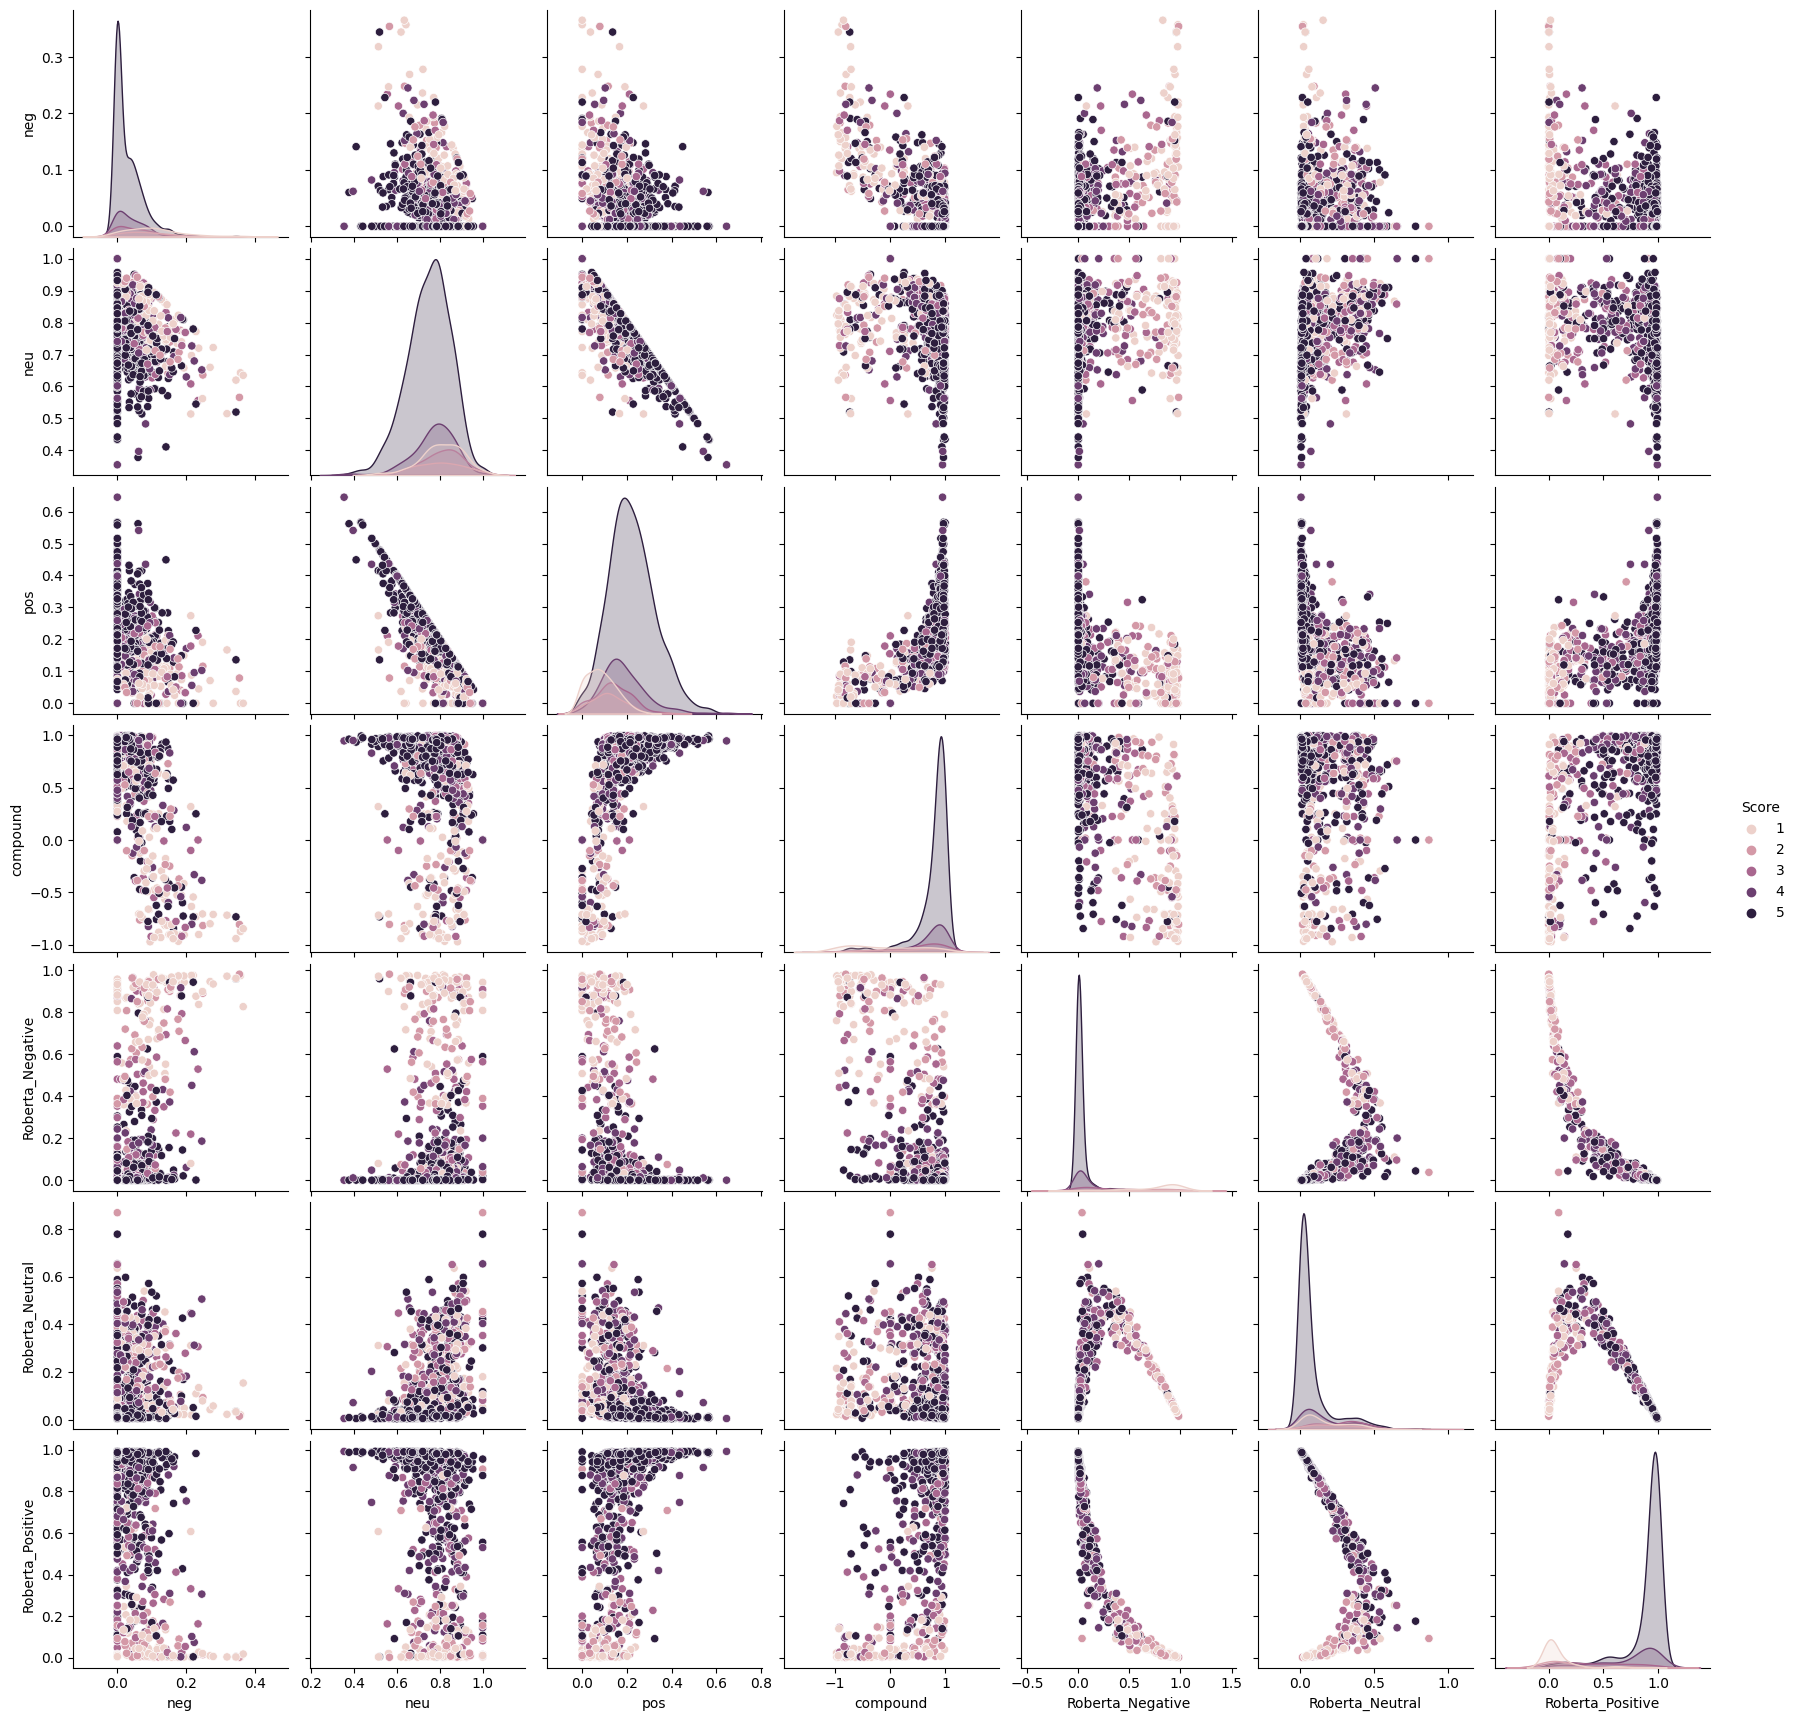

In [124]:

sns.pairplot(data = score_2, vars = ['neg', 'neu', 'pos', 'compound', 'Roberta_Negative',
       'Roberta_Neutral', 'Roberta_Positive'], hue = 'Score')
plt.show()

# pairplot is telling us that vader model is not very confident but roberta model is very confident in its accuracy

## Using Pipeline feature from Hugging Face's Transformers Library for NLP

In [93]:
from transformers import pipeline
analysis = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


E:\Lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Dell\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [115]:
pipelinefunction = {}
for i, row in reviews.iterrows():
    try:
        text = row['Text']
        myid = row['ID']
        pipelinefunction[myid] = analysis(text)
    except RuntimeError:
        print("Runtime Error")

Runtime Error
Runtime Error
Runtime Error
Runtime Error
Runtime Error
Runtime Error
Runtime Error


In [116]:
pipelinefunction

{1: [{'label': 'POSITIVE', 'score': 0.9983851909637451}],
 2: [{'label': 'NEGATIVE', 'score': 0.9995254278182983}],
 3: [{'label': 'POSITIVE', 'score': 0.9997652173042297}],
 4: [{'label': 'POSITIVE', 'score': 0.9991534948348999}],
 5: [{'label': 'POSITIVE', 'score': 0.9987082481384277}],
 6: [{'label': 'POSITIVE', 'score': 0.9992551207542419}],
 7: [{'label': 'POSITIVE', 'score': 0.9993639588356018}],
 8: [{'label': 'POSITIVE', 'score': 0.9998829364776611}],
 9: [{'label': 'POSITIVE', 'score': 0.9985174536705017}],
 10: [{'label': 'POSITIVE', 'score': 0.9994561076164246}],
 11: [{'label': 'POSITIVE', 'score': 0.9361911416053772}],
 12: [{'label': 'NEGATIVE', 'score': 0.9992430210113525}],
 13: [{'label': 'NEGATIVE', 'score': 0.9899449944496155}],
 14: [{'label': 'POSITIVE', 'score': 0.9998890161514282}],
 15: [{'label': 'POSITIVE', 'score': 0.9976365566253662}],
 16: [{'label': 'POSITIVE', 'score': 0.9992697834968567}],
 17: [{'label': 'POSITIVE', 'score': 0.9688596725463867}],
 18: [

In [117]:
pipelinefunction = pd.DataFrame(pipelinefunction)

In [118]:
pipelinefunction

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
0,"{'label': 'POSITIVE', 'score': 0.9983851909637...","{'label': 'NEGATIVE', 'score': 0.9995254278182...","{'label': 'POSITIVE', 'score': 0.9997652173042...","{'label': 'POSITIVE', 'score': 0.9991534948348...","{'label': 'POSITIVE', 'score': 0.9987082481384...","{'label': 'POSITIVE', 'score': 0.9992551207542...","{'label': 'POSITIVE', 'score': 0.9993639588356...","{'label': 'POSITIVE', 'score': 0.9998829364776...","{'label': 'POSITIVE', 'score': 0.9985174536705...","{'label': 'POSITIVE', 'score': 0.9994561076164...",...,"{'label': 'POSITIVE', 'score': 0.993966817855835}","{'label': 'POSITIVE', 'score': 0.9997922778129...","{'label': 'POSITIVE', 'score': 0.9998236298561...","{'label': 'POSITIVE', 'score': 0.8895456790924...","{'label': 'POSITIVE', 'score': 0.9989738464355...","{'label': 'POSITIVE', 'score': 0.9997904896736...","{'label': 'POSITIVE', 'score': 0.8036801815032...","{'label': 'POSITIVE', 'score': 0.9995176792144...","{'label': 'NEGATIVE', 'score': 0.9975288510322...","{'label': 'NEGATIVE', 'score': 0.9974752068519..."


In [119]:
pipelinefunction = pipelinefunction.T

In [120]:
pipelinefunction

,0
1,"{'label': 'POSITIVE', 'score': 0.9983851909637..."
2,"{'label': 'NEGATIVE', 'score': 0.9995254278182..."
3,"{'label': 'POSITIVE', 'score': 0.9997652173042..."
4,"{'label': 'POSITIVE', 'score': 0.9991534948348..."
5,"{'label': 'POSITIVE', 'score': 0.9987082481384..."
...,...
996,"{'label': 'POSITIVE', 'score': 0.9997904896736..."
997,"{'label': 'POSITIVE', 'score': 0.8036801815032..."
998,"{'label': 'POSITIVE', 'score': 0.9995176792144..."
999,"{'label': 'NEGATIVE', 'score': 0.9975288510322..."


### Pipeline feature is an easy get away to conduct sentiment analysis as we saw above.